In [36]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
!nproc

2


In [54]:
# Para crear procesos
import os

# Para trabajar con arrelgos numpy, una herramienta potente para todo lo que es 
# calculo numerico
import numpy as np 

#Para graficar
import matplotlib.pyplot as plt

# Para trabajar con datasets, se usa mucho para analisis de datos
import pandas as pd

In [55]:
def plot(ths, time, std, filtro):

    fig, ax = plt.subplots()
    ax.plot(ths, time,'b-', color='blue')
    if np.any(std) != 0:
        ax.fill_between(ths, time-std, time+std, color='turquoise')


    ax.set(xlabel='#Threads', ylabel='Time (s)',
           title='Performance ' + filtro + ' multi-thread')
    ax.grid()

    fig.savefig("test.png")
    plt.show()

In [40]:
! unzip "/content/drive/My Drive/tp2-IMAGINE.zip"

Archive:  /content/drive/My Drive/tp2-IMAGINE.zip
replace tp2-IMAGINE/.git/ORIG_HEAD? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: tp2-IMAGINE/.git/ORIG_HEAD  
  inflating: tp2-IMAGINE/.git/config  
  inflating: tp2-IMAGINE/.git/hooks/fsmonitor-watchman.sample  
  inflating: tp2-IMAGINE/.git/hooks/commit-msg.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-rebase.sample  
  inflating: tp2-IMAGINE/.git/hooks/prepare-commit-msg.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-applypatch.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-commit.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-push.sample  
  inflating: tp2-IMAGINE/.git/hooks/update.sample  
  inflating: tp2-IMAGINE/.git/hooks/applypatch-msg.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-merge-commit.sample  
  inflating: tp2-IMAGINE/.git/hooks/pre-receive.sample  
  inflating: tp2-IMAGINE/.git/hooks/post-update.sample  
  inflating: tp2-IMAGINE/.git/info/exclude  
  inflating: tp2-IMAGINE/.git/description  
  infl

In [41]:
! cd tp2-IMAGINE/src/;make

make: Nothing to be done for 'all'.


Los filtros elegidos para la experimentación fueron los de brightness y boxblur. Ambos fueron elegidos en base a la complejidad de sus algoritmos, pensando que la utilización de varios threads en brightness no cambiaría mucho el tiempo (esperamos una pequeña mejoría), debido a que se trata de un algoritmo, dentro de todo, sencillo. Mientras que esperamos que boxblur mejore su tiempo de ejecución con más threads debido a que es un algoritmo más "complejo".

Aclaraciones:


*   Por la forma en la que está hecho el código, cuando se dice que se está haciendo en 1 thread, en realidad son 2.
*   La computadora en la que realizamos el experimento contiene 2 cores y 2 hilos por core. 
*   En los gráficos el último valor de threads es 32 solo que no es escrito. 







In [42]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,18):
  if n_threads == 17:
    n_threads = 32
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,989,0.017519,1
1,989,0.017021,1
2,989,0.017389,1
3,989,0.018282,1
4,989,0.017490,1
...,...,...,...
335,989,0.020004,32
336,989,0.020040,32
337,989,0.019673,32
338,989,0.023259,32


In [43]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.017691
2     0.015601
3     0.015573
4     0.015525
5     0.015616
6     0.015532
7     0.015822
8     0.016105
9     0.015979
10    0.015961
11    0.016653
12    0.016695
13    0.016792
14    0.017213
15    0.016912
16    0.016918
32    0.019627
Name: Time, dtype: float64

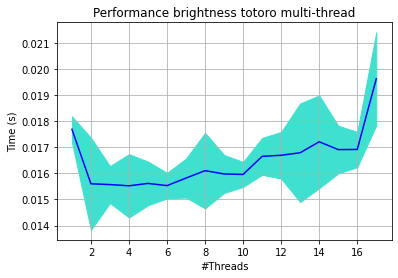

Ganancia maxima: 12.246801366785075 %


In [44]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,18)

plot(ths,df_mean_time, df_std_time, 'brightness totoro' )
max = df_mean_time.get(1)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BRIGHTNESS TOTORO

Tomando a Totoro que es una imagen grande(989px) y aplicando multithread creímos que el tiempo iba a disminuir en comparacion con el singlethread, cosa que sucedio, dando como ganancia maxima un 12,9% de tiempo a comparacion del singlethread (recordemos que en nuestro caso cuando hablamos de single thread hablamnos de 2 threads).

In [45]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,18):
  if n_threads == 17:
    n_threads = 32
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/totoro.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,987,0.114406,1
1,987,0.115839,1
2,987,0.111330,1
3,987,0.109595,1
4,987,0.112531,1
...,...,...,...
335,987,1.307176,32
336,987,1.323331,32
337,987,1.320064,32
338,987,1.316888,32


In [46]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.111061
2     0.138312
3     0.174524
4     0.211016
5     0.250317
6     0.287194
7     0.327344
8     0.367650
9     0.403317
10    0.442631
11    0.483600
12    0.518785
13    0.561495
14    0.597329
15    0.697128
16    0.681051
32    1.312219
Name: Time, dtype: float64

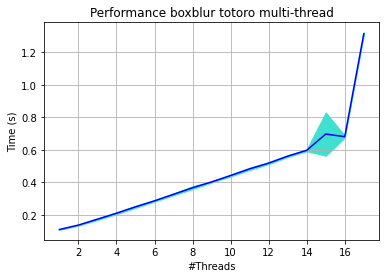

Ganancia maxima: 0.0 %


In [47]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,18)

plot(ths,df_mean_time, df_std_time, 'boxblur totoro' )
max = df_mean_time.get(1)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BOXBLUR TOTORO

Volviendo a usar la imagen de Totoro pero aplicandole boxblur nos llevamos la sorpresa de que el tiempo aumentaba a medida que aumentaban los threads, sin llegar a superar la performance del single thread. **Creemos** que el tiempo en el que se aplica el filtro es mas o menos el mismo, pero el tiempo total va aumentando de manera casi lineal, por la creación de threads, tambien tenemos la teoria de que la imagen no es lo suficientemente grande como para que convenga paralelizar, y por estas razones la ganancia es de 0%.

In [48]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,18):
  if n_threads == 17:
    n_threads = 32
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0 imgs/house_1.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,111,0.000848,1
1,111,0.000733,1
2,111,0.000754,1
3,111,0.000735,1
4,111,0.000751,1
...,...,...,...
335,111,0.001965,32
336,111,0.004778,32
337,111,0.005963,32
338,111,0.004968,32


In [49]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.000699
2     0.001090
3     0.001238
4     0.001061
5     0.001488
6     0.001810
7     0.001963
8     0.002147
9     0.002230
10    0.002449
11    0.002748
12    0.002665
13    0.002688
14    0.003175
15    0.003210
16    0.003101
32    0.005063
Name: Time, dtype: float64

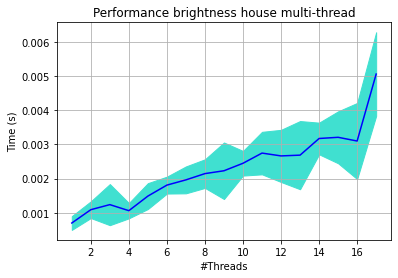

Ganancia maxima: 0.0 %


In [50]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,18)

plot(ths,df_mean_time, df_std_time, 'brightness house' )
max = df_mean_time.get(1)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BRIGHTNESS HOUSE

Al intentar el experimento con una imagen más chica, house_1(111px), podemos ver que el tiempo promedio es menor ya que hay menos pixeles sobre los que aplicar el filtro, pero al hacerlo multithread podemos ver que el tiempo máximo es mucho más que el tiempo en single thread, ya que estamos creando threads que se van a ocupar de muy poca cantidad de pixeles, entonces va a ser mayor el costo de tiempo para crearlos que la mejoría en la ejecución, esto se ve evidenciado en la ganancia que es 0%.

In [51]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,18):
  if n_threads == 17:
    n_threads = 32
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 imgs/house_1.ppm out/salida.ppm 0"
  for i in range(20):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,109,0.002560,1
1,109,0.002543,1
2,109,0.003336,1
3,109,0.003116,1
4,109,0.003161,1
...,...,...,...
335,109,0.032258,32
336,109,0.031297,32
337,109,0.032020,32
338,109,0.031414,32


In [52]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     0.003018
2     0.003827
3     0.004516
4     0.006044
5     0.006568
6     0.008292
7     0.008650
8     0.009295
9     0.010346
10    0.011186
11    0.012367
12    0.013434
13    0.014019
14    0.014703
15    0.015324
16    0.016933
32    0.031905
Name: Time, dtype: float64

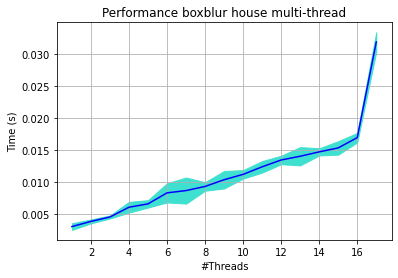

Ganancia maxima: 0.0 %


In [53]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,18)

plot(ths,df_mean_time, df_std_time, 'boxblur house' )
max = df_mean_time.get(1)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BOXBLUR HOUSE

En boxblur se mantiene el aumento de tiempo de manera lineal, podemos ver que la ganancia sigue siendo 0, comprobando un poco nuestra hipotesis sobre que el tamano de la imagen influye en si conviene o no el uso del multithreading.

¿Cuán determinante es la configuración de hardware donde se corren los experimentos y como
puede relacionarse con lo observado?

La configuración del hardware se relaciona con el experimento ya que estamos intentando la paralelización de tareas y esto solo sería optimo hasta cierto punto, en donde deberíamos tener la misma cantidad de nucleos lógicos que tareas, en el caso de que las tareas fuesen más, estas dejarían de ejecutarse de forma paralela y se ejecutarían de forma concurrente, por ende ya no convendría paralelizar tanto por el tiempo que sumaría la concurrencia.

¿Hay diferencias de performance para los distintos tipos de filtros Multi-thread?

Sí, hay diferencia de performance, y esto se puede ver en nuestros ejemplos, que serían brightness y boxblur, en el grafico de brightness podemos observar como en algunas corridas de multithread la performance mejora, haciendo que el gráfico se vea más variable, mientras que el gráfico de boxblur es más lineal, lo que significa que cuantos más threads se hagan, peor es la performance. Aun asi no hay que olvidar que el tamano de las imagenes tambien es crucial.

En base a lo visto, ¿siempre es conveniente paralelizar? ¿De qué factores de la entrada depende
esto?

En base a lo visto, no, no siempre es conveniente paralelizar, y depende, por ejemplo, del tamaño de las imágenes y los filtros elegidos. Entonces, lo que podemos decir es que, a veces no es conveniente paralelizar el aplicado de filtros de una imagen, como por ejemplo con el filtro boxblur, en el cual si se hace multithread la performance empeora notablemente, así como tampoco conviene utilizar varios threads para aplicar un filtro en una imagen muy pequeña, porque se tarda más en crear los threads a que estos apliquen el filtro a las imágenes. En cambio, por ejemplo, podemos ver que en la imagen de Totoro con la aplicación del filtro brightness, con una cierta cantidad de threads, la performance mejora.

In [23]:
#Creamos imagen re grande
os.system("cd tp2-IMAGINE/src/; ./main zoom 1 16 imgs/totoro.ppm out/superTotoro.ppm 0")

0

In [24]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,18):
  if n_threads == 17:
    n_threads = 32
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main boxblur " + str(n_threads) +  " 0 out/superTotoro.ppm out/salida.ppm 0"
  for i in range(5):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

cd tp2-IMAGINE/src/; ./main boxblur 1 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 1 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 1 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 1 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 1 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 2 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 2 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 2 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 2 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 2 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 3 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 3 0 out/superTotoro.ppm out/salida.ppm 0
cd tp2-IMAGINE/src/; ./main boxblur 3 0 out/superTotoro.ppm out/salida.ppm 0

,Width,Time,Threads
0,15822,28.025072,1
1,15822,27.988075,1
2,15822,28.007127,1
3,15822,28.025639,1
4,15822,31.254844,1
...,...,...,...
80,15822,343.548717,32
81,15822,342.633842,32
82,15822,341.612819,32
83,15822,344.554872,32


In [25]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1      28.660151
2      45.106051
3      47.034280
4      54.936714
5      77.952131
6      75.574700
7      87.721104
8      99.516838
9     107.206295
10    115.405894
11    126.276304
12    135.126847
13    144.870358
14    156.701366
15    166.255997
16    175.988712
32    342.635545
Name: Time, dtype: float64

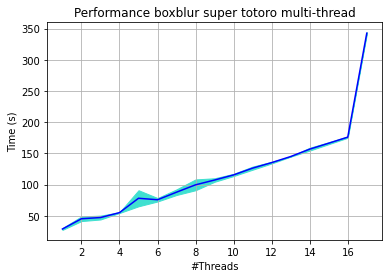

Ganancia maxima: 0.0 %


In [26]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,18)

plot(ths,df_mean_time, df_std_time, 'boxblur super totoro' )
max = df_mean_time.get(1)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA BOXBLUR SUPER TOTORO

In [56]:
! rm tp2-IMAGINE/pruebas/resultados.csv
for n_threads in range(1,18):
  if n_threads == 17:
    n_threads = 32
  cmd = "cd tp2-IMAGINE/src/; "
  cmd += "./main brightness " + str(n_threads) +  " 0.5 out/superTotoro.ppm out/salida.ppm 0"
  for i in range(5):
      os.system(cmd)
  
dataframe = pd.read_csv('tp2-IMAGINE/pruebas/resultados.csv', names=['Width', 'Time', 'Threads'])
dataframe

,Width,Time,Threads
0,15824,4.204880,1
1,15824,4.199075,1
2,15824,4.183459,1
3,15824,4.225832,1
4,15824,4.208488,1
...,...,...,...
80,15824,3.567912,32
81,15824,3.550109,32
82,15824,3.542334,32
83,15824,3.584976,32


In [57]:
df_mean_time = dataframe.groupby('Threads')['Time'].mean()
df_std_time = dataframe.groupby('Threads')['Time'].std()
df_mean_time

Threads
1     4.204347
2     3.567292
3     3.572862
4     3.557568
5     3.589983
6     3.564725
7     3.793656
8     3.545184
9     4.150543
10    3.551969
11    3.557822
12    3.554973
13    3.807072
14    3.540341
15    3.552101
16    3.556229
32    3.562155
Name: Time, dtype: float64

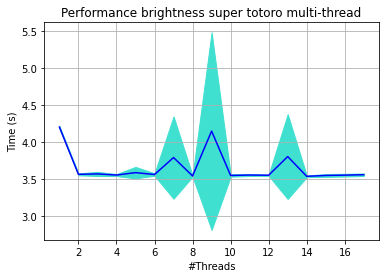

Ganancia maxima: 15.793307060207301 %


In [58]:
# Graficamos el costo (time) en funcion de la cantidad de threads
ths = np.arange(1,18)

plot(ths,df_mean_time, df_std_time, 'brightness super totoro' )
max = df_mean_time.get(1)
min = np.min(df_mean_time)
gain = ( max - min ) / max * 100 
print("Ganancia maxima:" , gain ,"%")
#FIN PRUEBA brightness SUPER TOTORO

Luego de haber realizado los experimentos con una imagen de 15824 px (fue creada con el filtro zoom), podemos concluir nuestras hipotesis, el filtro brightness aplicado en una imagen muy grande y en multithread nos da una ganancia del 15%, o sea que si conviene un poco, pero no mucho. Mientras que el filtro boxblur aplicado en la misma imagen sigue dando pesimos resultados, no creemos que sea porque no convenga aplicar el multithread, sino que teorizamos que puede deberse a la capacidad del entorno, o sea 2 cores 2 hilos, o a la forma en la que nosotros implementamos la paralelizacion. 

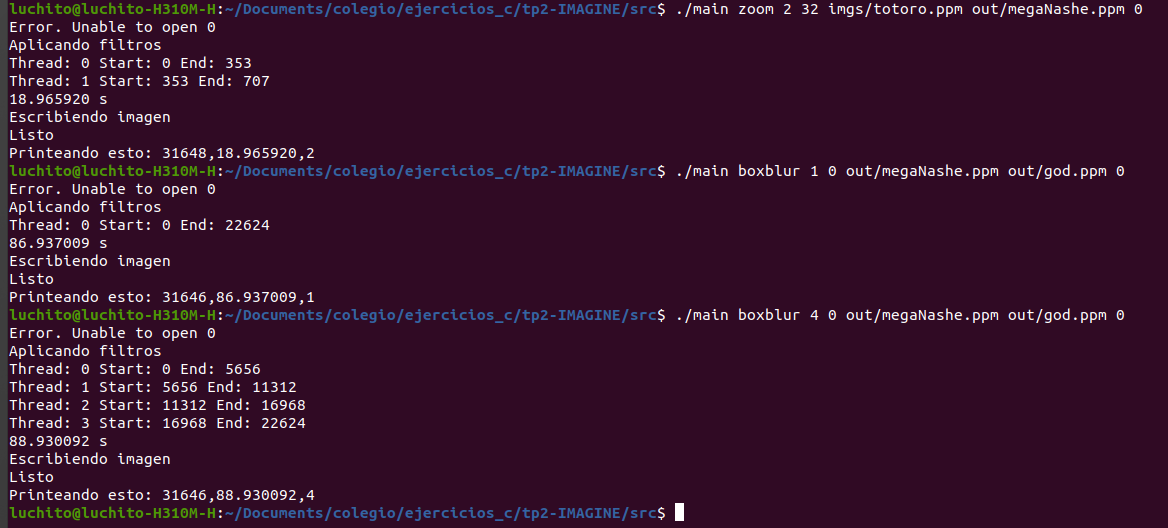

Adjuntamos imagenes de una prueba hecha de manera local, con un 4 cores de 1 hilo cada uno, demostrando que una imagen 31648x22624 px sigue sin ser viable la paralelizacion.

